In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
blocks_map = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('nyc_census_tracts.csv', index_col=0)

In [64]:
blocks_map.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [65]:
census.columns

Index(['County', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [66]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [67]:
census.County.unique()

array(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], dtype=object)

In [68]:
blocks_map = blocks_map[blocks_map.County.isin(['Bronx','Kings','New York','Queens', 'Richmond'])]
blocks_map['Tract'] = blocks_map.BlockCode // 10000
blocks_map = blocks_map.merge(census,how='left',right_index=True,left_on='Tract')

blocks_map.tail()

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
36910,40.914171,-73.919095,360050309000001,Bronx,NY,36005030900,Bronx,Bronx,3896.0,1626.0,...,1.9,6.7,10.3,45.9,1301.0,78.6,10.0,10.5,0.9,5.5
36911,40.914171,-73.915930,360050319000001,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3
36912,40.914171,-73.912764,360050319000001,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3
36913,40.914171,-73.909598,360050319001002,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3
37111,40.916432,-73.915930,360050319000001,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3


In [69]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [70]:
def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks_map.Latitude,blocks_map.Longitude,data_values)
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    
    plt.show()

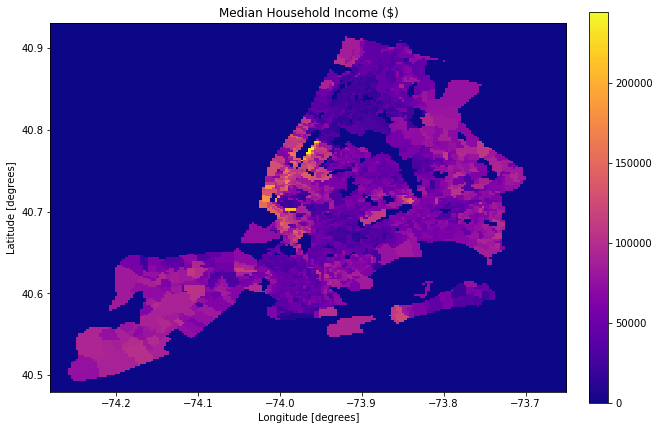

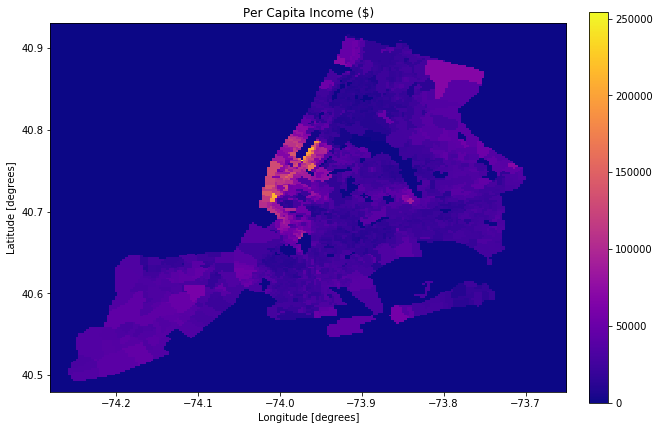

In [74]:
make_plot(blocks_map.Income,colors='plasma',title='Median Household Income ($)')
make_plot(blocks_map.IncomePerCap,colors='plasma',title='Per Capita Income ($)')

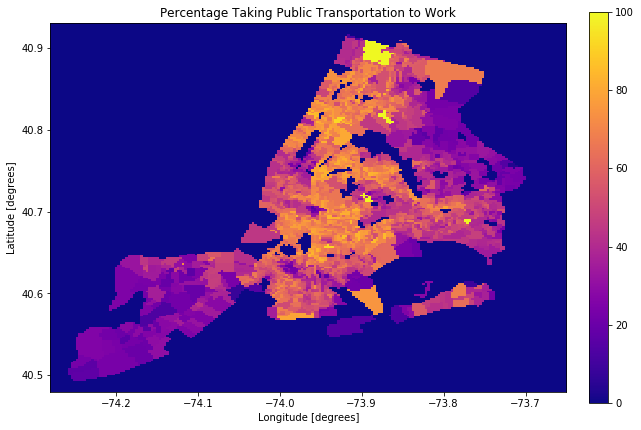

In [75]:
make_plot(blocks_map.Transit,colors='plasma',title='Percentage Taking Public Transportation to Work')

In [88]:
blocks_map[['Latitude','Longitude', 'BlockCode', 'County_x', 'Transit']].sort_values('Transit',ascending=False)

,Latitude,Longitude,BlockCode,County_x,Transit
27727,40.810151,-73.865276,360050024000001,Bronx,100.0
27728,40.810151,-73.862111,360050024000001,Bronx,100.0
34123,40.882513,-73.877940,360050435001025,Bronx,100.0
34124,40.882513,-73.874774,360050435001025,Bronx,100.0
34125,40.882513,-73.871608,360050435001025,Bronx,100.0
34126,40.882513,-73.868442,360050435001035,Bronx,100.0
34320,40.884774,-73.887437,360050435001031,Bronx,100.0
34321,40.884774,-73.884271,360050435001024,Bronx,100.0
34322,40.884774,-73.881106,360050435001024,Bronx,100.0
34324,40.884774,-73.874774,360050435001025,Bronx,100.0


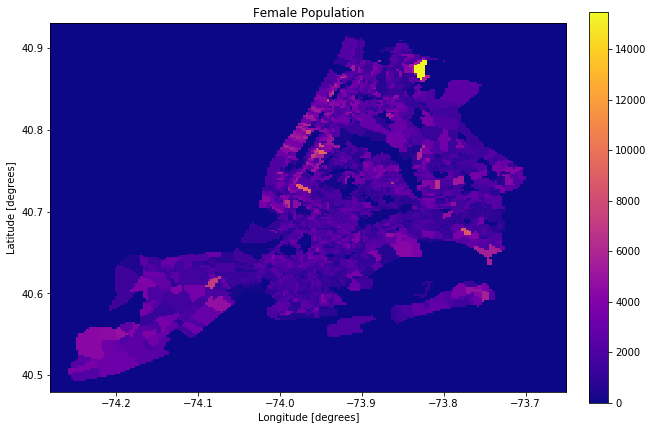

In [77]:
make_plot(blocks_map.Women,colors='plasma',title='Female Population')

In [96]:
blocks_map[['Latitude','Longitude', 'BlockCode', 'County_x', 'Women', 'Men']].sort_values('Women',ascending=False)

,Latitude,Longitude,BlockCode,County_x,Women,Men
34139,40.882513,-73.827286,360050462011016,Bronx,15466.0,13460.0
33340,40.873467,-73.824121,360050462011008,Bronx,15466.0,13460.0
32339,40.862161,-73.827286,360050462011032,Bronx,15466.0,13460.0
34341,40.884774,-73.820955,360050462011002,Bronx,15466.0,13460.0
33137,40.871206,-73.833618,360050462018002,Bronx,15466.0,13460.0
33537,40.875729,-73.833618,360050462018005,Bronx,15466.0,13460.0
33538,40.875729,-73.830452,360050462013004,Bronx,15466.0,13460.0
33539,40.875729,-73.827286,360050462014000,Bronx,15466.0,13460.0
33540,40.875729,-73.824121,360050462011008,Bronx,15466.0,13460.0
33339,40.873467,-73.827286,360050462018005,Bronx,15466.0,13460.0
